## CVU Open and Reproducible Research Computing (Fall 2022)

### Assignment Notebook: Time Series Analysis

#### 1. Install the `bmi_nwis` library (if it's not installed already)

In [1]:
pip install bmi_nwis

Note: you may need to restart the kernel to use updated packages.


#### 2. Import the libraries required for the assignment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataretrieval.nwis as nwis

output_pkl_file = 'streamflow_data_'

#### 3a. Choose one of the following USGS stream gages to analyze

Uncomment __one__ of the following `site_id` variable declarations. Leave `my_start_date` and `my_end_date` unchanged. All of the sites below have at least 40 years of record. Only the Cache la Poudre has less than 50. 

In [3]:
site_id = '13185000' # Boise River at Twin Springs
# site_id = '13139510' # Big Wood River at Hailey
# site_id = '13246000' # North Fork of the Payette near Banks
# site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
# site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start_date = '1970-10-01'
my_end_date = '2020-09-30'

#### 4. Get the Flow Data

In [4]:
df_flow = nwis.get_record(sites=site_id, service='dv', 
                          start=my_start_date, end=my_end_date)
df_flow

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
1970-10-01 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,378.0,A
1970-10-02 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,375.0,A
1970-10-03 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,373.0,A
1970-10-04 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,369.0,A
1970-10-05 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,367.0,A
...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,407.0,A
2020-09-27 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,417.0,A
2020-09-28 00:00:00+00:00,NaN,NaN,13185000,NaN,NaN,NaN,NaN,377.0,A


#### 5. Plot the Data

Text(0, 0.5, 'Discharge (ft${}^3$/s)')

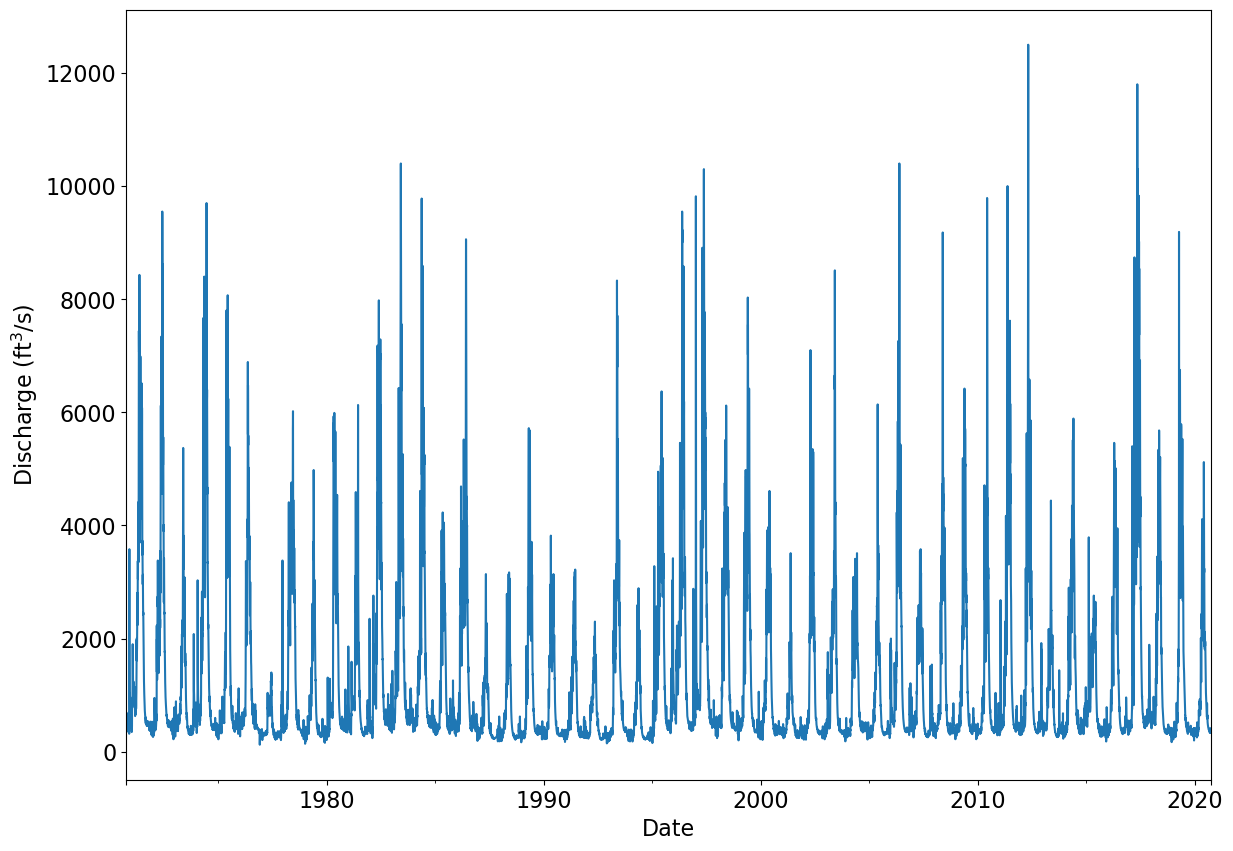

In [5]:
plt.rcParams.update({'font.size': 16})

ax1 = df_flow['00060_Mean'].plot(x='datetime', figsize=(14,10))

ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (ft${}^3$/s)')

#### 6. Wrangle the Data into a `pandas` DataFrame object

Steps: 
* Get the dates and streamflow out of the object returned by our call to `Nwis.nwis()`
* Convert the streamflow in ft${}^3$/s to m${}^3$/s
* Create a water year vector so we can analyze data by water year
* Create a `pandas.DataFrame()` with the data

In [6]:
# Get the dates and convert them to a Pandas datetime object
dates = df_flow.index
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = df_flow['00060_Mean'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = df_flow.index.year.values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? 
df.to_pickle(output_pkl_file+site_id+'.pkl')

# Show the dataframe we've created
df

,Dates,WaterYear,Discharge_cfs,Discharge_cms
Dates,,,,
1970-10-01 00:00:00+00:00,1970-10-01 00:00:00+00:00,1971,378.0,10.704158
1970-10-02 00:00:00+00:00,1970-10-02 00:00:00+00:00,1971,375.0,10.619205
1970-10-03 00:00:00+00:00,1970-10-03 00:00:00+00:00,1971,373.0,10.562569
1970-10-04 00:00:00+00:00,1970-10-04 00:00:00+00:00,1971,369.0,10.449298
1970-10-05 00:00:00+00:00,1970-10-05 00:00:00+00:00,1971,367.0,10.392662
...,...,...,...,...
2020-09-26 00:00:00+00:00,2020-09-26 00:00:00+00:00,2020,407.0,11.525377
2020-09-27 00:00:00+00:00,2020-09-27 00:00:00+00:00,2020,417.0,11.808556
2020-09-28 00:00:00+00:00,2020-09-28 00:00:00+00:00,2020,377.0,10.675841


#### 7. Compute the Seasonal Cycle and Plot

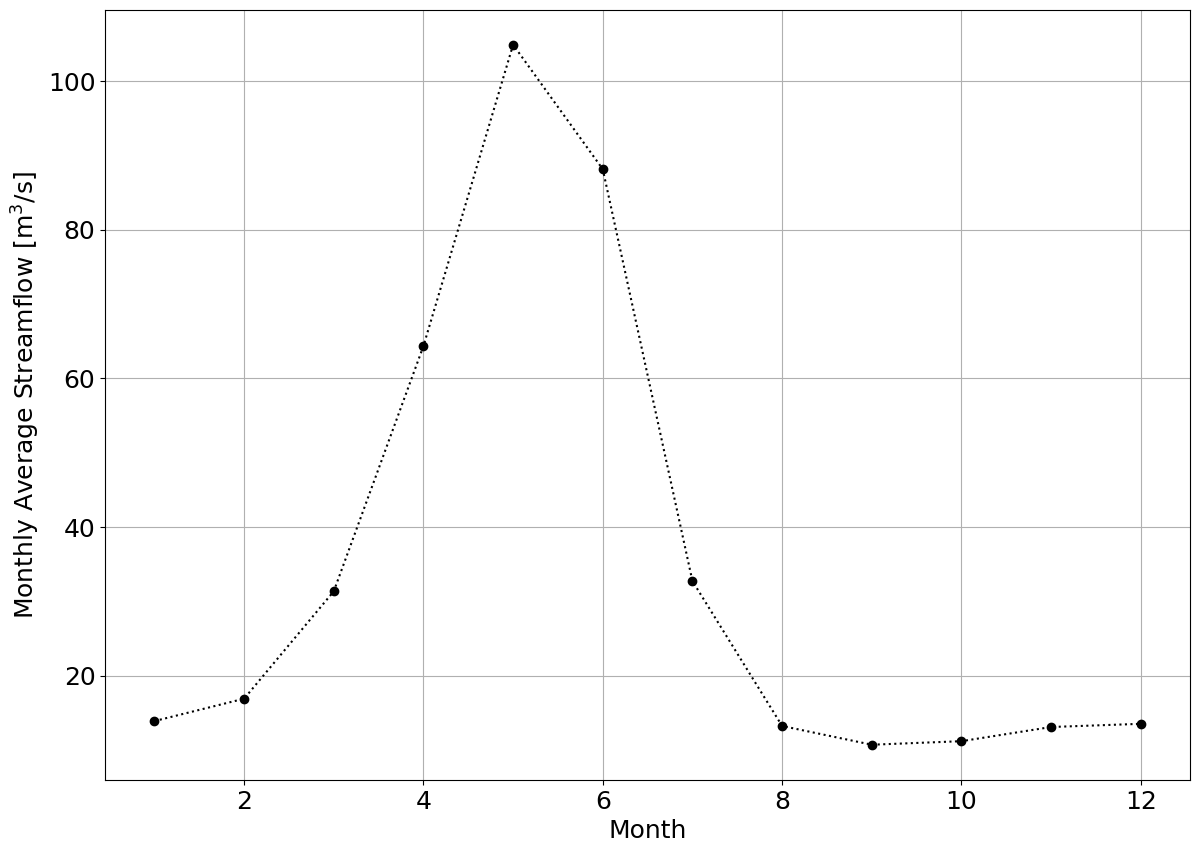

In [7]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

## Instructions
---

1. Download this notebook into the folder for your repository for this module by opening a terminal window, navigating to your repository folder and issuing the command `curl -OL https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb`. Or, [click on this link](https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb) and save the page to your local repository.  
2. Verify that the notebook runs to this point 
3. Go back and change the `site_id` variable to a gage of your choosing by commenting out the current gage selected and uncommenting the gage you would like to investigate. Then in the Jupyter Lab menu go to "Kernel > Restart Kernel and Clear All Outputs" and click "Restart" when prompted
4. Re-run the notebook to this point
5. Now group the streamflow data by `WaterYear` and get the maximum streamflow value for each Water Year. You will need to use the `.groupby()` followed by the `.max()` methods. This should be very similar to the commands used to find the seasonal cycle above, but be sure to make sure to group by Water Year! Store the output of that operation in a variable called `Q_ams`. Print the output of `Q_ams` to see which years were associated with the lowest 5 and highest 5 annual maximum streamflows. __Note:__ See this [DataFrame.groupby()](https://www.geeksforgeeks.org/pandas-groupby/) and [DataFrame.max()](https://www.geeksforgeeks.org/python-pandas-dataframe-max/) documentation for help. 
6. Now sort the annual maximum series in ___descending order___ using the `.sort_values()` method. Use the `.values` to save these values to a numpy array. __Note:__ See this [DataFrame.sort_values()](https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/) and [DataFrame.values](https://www.geeksforgeeks.org/python-pandas-dataframe-values/) documentation for help. 
7. Compute the Weibull plotting position value for each streamflow value. The Weibull series is calculated using the formula:

    $$
    p_i = \frac{r_i}{n+1},
    $$

    where $r_i$ is the rank of the $i$th observation, $n$ is the number of annual maximum observations, and $p_i$ is the exceedance probability. Use the numpy command `np.arange()` method and the `.size` attribute on your annual maximum series array to create an array of ranks associated with each annual maximum value.
8. Create a presentation quality plot showing the annual maximum streamflows on the x-axis and the exceedance probability on the y axis. __Note:__ See this [numpy.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and [numpy.size()](https://numpy.org/doc/stable/reference/generated/numpy.broadcast.size.html) documentation for help. 
9. The $T$-year recurrence interval is associated with an exceedance probability of $p$ which is calculated using:

    $$ 
    p = \frac{1}{T} 
    $$

    Calculate the values of the 20- and 50- year recurrence interval events directly from the Weibull plotting position values by using the numpy `np.interp()` function, which does a very basic interpolation (there are more sophisticated ones, but this is sufficient for now). __Note:__ See this [numpy.interp()](https://www.geeksforgeeks.org/numpy-interp-function-python/) documentation for help.  

In [8]:
# Question 5: Find the maximum value for each water year
Q_ams = df['Discharge_cms'].groupby(by=df['WaterYear']).max().values # Input Discharge and group by the water year. Max values to get the maximum for each year
print(Q_ams) # Result should be 50 values representing the largest discharge values for 50 water years

[238.71972516 270.43575033 152.06701354 274.68343227 228.5252885
 195.11019055  39.64503146 170.47363529 141.02304049 169.6240989
 173.58860204 225.97667933 294.505948   276.94886264 119.78463077
 256.55998932  88.91814199  89.76767838 161.9782714  108.17430013
  91.18357236  65.13112312 235.8879372   81.83867209 180.38489315
 270.43575033 291.67416004 173.30542325 227.39257331 130.54542503
  99.39575745 201.05694527 240.98515553  99.39575745 173.87178084
 294.505948   101.37800902 259.95813487 181.80078713 277.23204144
 283.17879616 353.9734952  125.73138549 166.79231094 107.32476374
 154.6156227  334.15097947 160.84555622 260.24131367 144.98754363]


In [9]:
# Question 6: Sort the values in descending order
temp = Q_ams.argsort()[::-1]
ranks = np.empty_like(temp) # Creates a ranking that will remain 1-50 even after sorting Q_ams values in descending order
ranks[temp] = np.arange(len(Q_ams))+1 # np.arange gives values 0-49; +1 gives values 1-50

Year = df['WaterYear'].groupby(by=df['WaterYear']).mean().values # Input Water Year and group by the water year. Mean values to get one number for each year (50 years)
Q_ams_sort = pd.DataFrame() # Creates a table
Q_ams_sort['Q_ams'] = Q_ams # Creates a column for Q_ams
Q_ams_sort['Year'] = Year # Creates a column for Year
Q_ams_sort['Rank'] = ranks # Creates a column for Ranking

Q_ams_sort.sort_values("Q_ams", axis = 0, ascending = False, # Sorts Q_ams values; Ascending = False gives values in descending order
                 inplace = True, na_position ='first')
print(Q_ams_sort) # Should be a table with 3 columns where Q_ams is discharge in descending order, Year is the water year it occurred; and rank is the order of discharge values

         Q_ams    Year  Rank
41  353.973495  2012.0     1
46  334.150979  2017.0     2
35  294.505948  2006.0     4
12  294.505948  1983.0     3
26  291.674160  1997.0     5
40  283.178796  2011.0     6
39  277.232041  2010.0     7
13  276.948863  1984.0     8
3   274.683432  1974.0     9
25  270.435750  1996.0    10
1   270.435750  1972.0    11
48  260.241314  2019.0    12
37  259.958135  2008.0    13
15  256.559989  1986.0    14
32  240.985156  2003.0    15
0   238.719725  1971.0    16
22  235.887937  1993.0    17
4   228.525288  1975.0    18
28  227.392573  1999.0    19
11  225.976679  1982.0    20
31  201.056945  2002.0    21
5   195.110191  1976.0    22
38  181.800787  2009.0    23
24  180.384893  1995.0    24
34  173.871781  2005.0    25
10  173.588602  1981.0    26
27  173.305423  1998.0    27
7   170.473635  1978.0    28
9   169.624099  1980.0    29
43  166.792311  2014.0    30
18  161.978271  1989.0    31
47  160.845556  2018.0    32
45  154.615623  2016.0    33
2   152.067014

In [10]:
# Question 7: Find the exceedence probability for each water year
n = Q_ams.size # Define the numeber of values in the column (should be 50)

p_ams = ranks/(n+1) # Weibull equation; r/(n+1)
print(p_ams) # Should be a vector of exceedence probability for each water year (in order of water year, not rank)

[0.31372549 0.21568627 0.66666667 0.17647059 0.35294118 0.43137255
 0.98039216 0.54901961 0.70588235 0.56862745 0.50980392 0.39215686
 0.05882353 0.15686275 0.76470588 0.2745098  0.92156863 0.90196078
 0.60784314 0.78431373 0.88235294 0.96078431 0.33333333 0.94117647
 0.47058824 0.19607843 0.09803922 0.52941176 0.37254902 0.7254902
 0.8627451  0.41176471 0.29411765 0.84313725 0.49019608 0.07843137
 0.82352941 0.25490196 0.45098039 0.1372549  0.11764706 0.01960784
 0.74509804 0.58823529 0.80392157 0.64705882 0.03921569 0.62745098
 0.23529412 0.68627451]


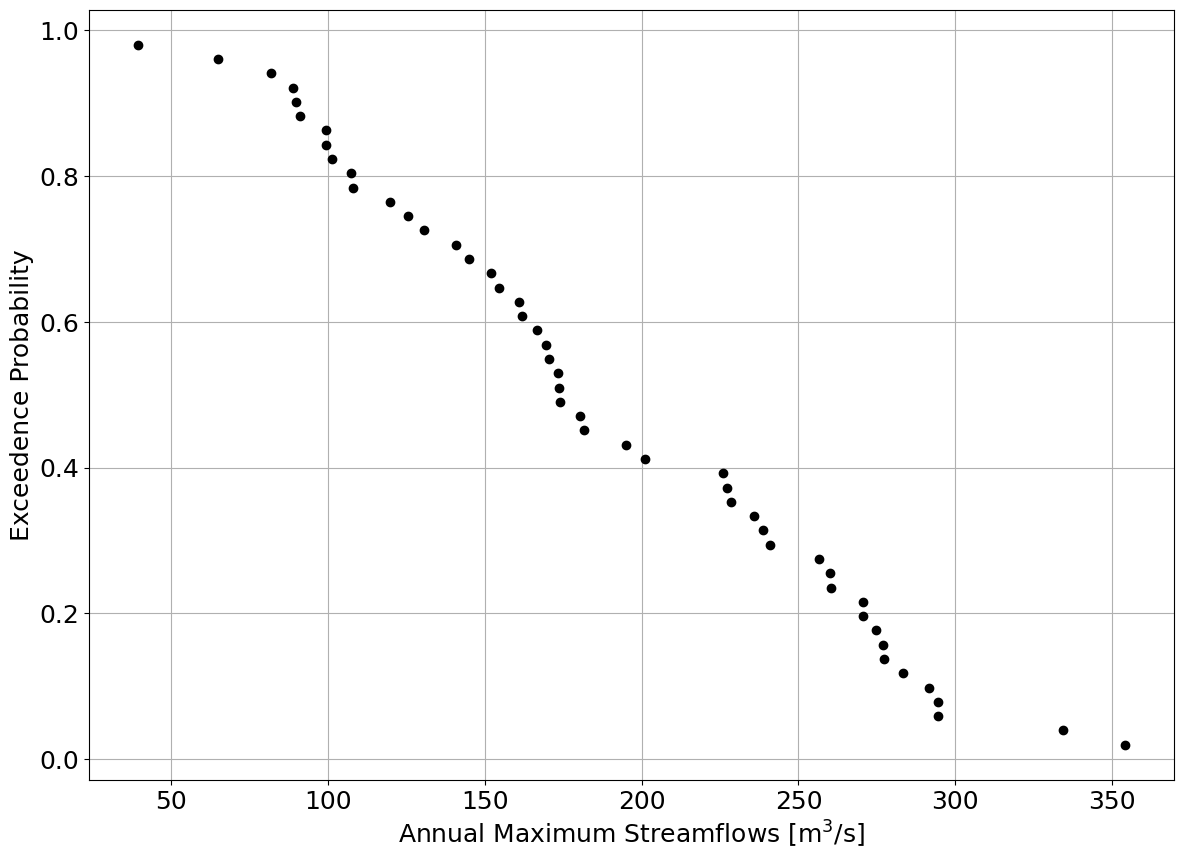

In [11]:
# Question 8
plt.figure(figsize=(14,10)) # plot a figure
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot(Q_ams,p_ams,'ko') # plot Discharge on the x-axis and Exceedence Probability on the y-axis)
plt.xlabel('Annual Maximum Streamflows [m${}^3$/s]') # x-axis label
plt.ylabel('Exceedence Probability') # y-axis label
plt.grid() # add a grid
plt.show() # show the graph

In [12]:
# Question 9
p20 = 1/20 # p=1/T
p50 = 1/50 # T-year recurrence is 20 years and 50 years
print(p20) # should solve the equation and give the probability for 20 year recurrence
print(p50) # should solve the equation and give the probability for 50 year recurrence

0.05
0.02


In [13]:
Q20 = np.interp(p20, p_ams, Q_ams) # interpolate the discharge values to give the value for when the probability is equal to 1/20
Q50 = np.interp(p50, p_ams, Q_ams) # interpolate the discharge values to give the value for when the probability is equal to 1/50

print('The 20-year flood event has a magnitude of {:.3f} m^3/s'.format(Q20)) # prints the answer in sentence format
print('The 50-year flood event has a magnitude of {:.3f} m^3/s'.format(Q50)) # prints the answer in sentence format

The 20-year flood event has a magnitude of 238.720 m^3/s
The 50-year flood event has a magnitude of 238.720 m^3/s
